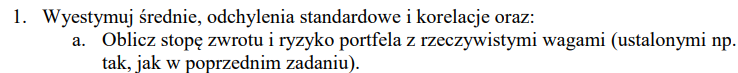

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import dc_stat_think as dcst
import seaborn as sns

In [6]:
pd.read_csv("JPY.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-04,106.429001,106.680000,105.995003,106.435997,106.435997,0.0
1,2018-04-05,106.783997,107.481003,106.716003,106.774002,106.774002,0.0
2,2018-04-06,107.081001,107.454002,106.969002,107.052002,107.052002,0.0
3,2018-04-09,106.949997,107.198997,106.852997,106.968002,106.968002,0.0
4,2018-04-10,106.720001,107.392998,106.628998,106.749001,106.749001,0.0
...,...,...,...,...,...,...,...
1300,2023-03-29,131.046005,132.697998,130.927994,131.046005,131.046005,0.0
1301,2023-03-30,132.576004,132.932999,132.222000,132.576004,132.576004,0.0
1302,2023-03-31,133.201004,133.563995,132.725998,133.201004,133.201004,0.0
1303,2023-04-03,133.347000,133.731003,132.220993,133.347000,133.347000,0.0


In [2]:
sns.set()

In [3]:
jpy = pd.read_csv("JPY.csv").Close
aud = pd.read_csv("AUD.csv").Close
jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

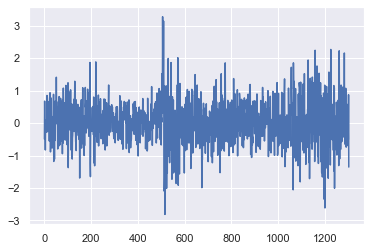

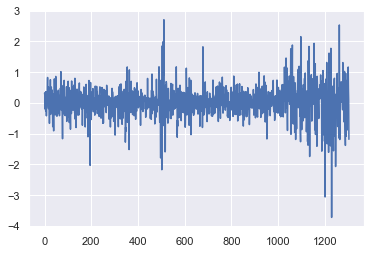

In [9]:
jpy1 = np.diff(jpy)/jpy[:-1]*100
aud1 = np.diff(aud)/aud[:-1]*100

plt.plot(aud1)
plt.show()
plt.plot(jpy1)
plt.show()

In [18]:
port = 0.71*jpy + 0.29*aud
PORT = np.diff(port)/port[:-1]*100

In [19]:
port1 = 0.71*jpy1 + 0.29*aud1

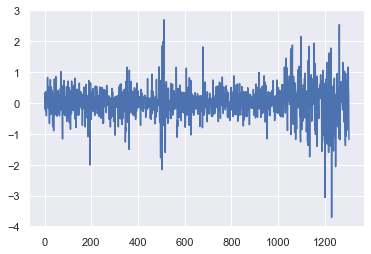

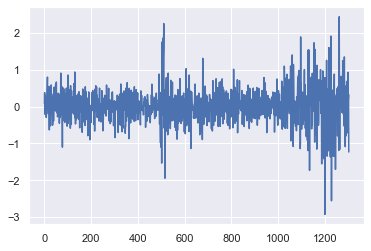

In [21]:
plt.plot(PORT)
plt.show()
plt.plot(port1)

In [14]:
from scipy.stats import pearsonr
corr, _ = pearsonr(jpy1, aud1)

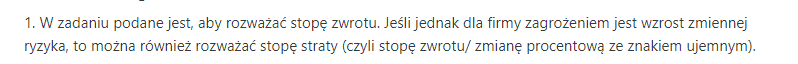

czyli można też po prostu zmiany procentowe?? <br>
CO TO STOPA ZWROTU

In [28]:
print("JPY: \n ŚREDNIA: ", np.mean(jpy1), "\n STD: ", np.std(jpy1, ddof=1))
print("AUD: \n ŚREDNIA: ", np.mean(aud1), "\n STD: ", np.std(aud1, ddof=1))
print("PORTFEL: \n ŚREDNIA: ", np.mean(port1), "\n STD: ", np.std(port1, ddof=1))
print("diff(+)???: \n ŚREDNIA: ", np.mean(PORT), "\n STD: ", np.std(PORT, ddof=1))
print("\nKORELACJA: ", corr)

JPY: 
 ŚREDNIA:  0.017683698574565847 
 STD:  0.5118107097382564
AUD: 
 ŚREDNIA:  0.012078081339205855 
 STD:  0.6581177723350751
PORTFEL: 
 ŚREDNIA:  0.016058069576311444 
 STD:  0.4580156102039098
diff(+)???: 
 ŚREDNIA:  0.017644860723791976 
 STD:  0.5102408269905676

KORELACJA:  0.2977773540069401


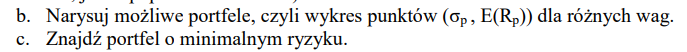

In [30]:
wA = np.arange(0,1.1,0.1)
wB = 1-wA
wB

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [71]:
wA = np.arange(0,1.05,0.05)

tt = ["{wA}JPY + {wB}AUD".format(wA = str(round(w,2)), wB =str(round(1-w,2))) for w in wA]
ms = []
st = []
for w in wA:
    data = w*jpy1 + (1-w)*aud1
    ms.append(np.mean(data))
    st.append(np.std(data, ddof=1))
d = {"portfel" : tt, "ŚREDNIA" : ms, "STD" : st}
qq = pd.DataFrame(data=d)
qq


,portfel,ŚREDNIA,STD
0,0.0JPY + 1.0AUD,0.012078,0.658118
1,0.05JPY + 0.95AUD,0.012358,0.633304
2,0.1JPY + 0.9AUD,0.012639,0.609508
3,0.15JPY + 0.85AUD,0.012919,0.586855
4,0.2JPY + 0.8AUD,0.013199,0.565482
5,0.25JPY + 0.75AUD,0.013479,0.545540
6,0.3JPY + 0.7AUD,0.013760,0.527191
7,0.35JPY + 0.65AUD,0.014040,0.510606
8,0.4JPY + 0.6AUD,0.014320,0.495963
9,0.45JPY + 0.55AUD,0.014601,0.483438


In [72]:
print("MIN RYZYKO:\n", qq.iloc[qq["STD"].idxmin(axis=0)])
print("\n")
print("MAX ZYSK:\n", qq.iloc[qq["ŚREDNIA"].idxmax(axis=0)])

MIN RYZYKO:
 portfel    0.65JPY + 0.35AUD
ŚREDNIA             0.015722
STD                 0.457567
Name: 13, dtype: object


MAX ZYSK:
 portfel    1.0JPY + 0.0AUD
ŚREDNIA           0.017684
STD               0.511811
Name: 20, dtype: object


In [68]:
##troche dokładniej
wA = np.arange(0,1.01,0.01)

tt = ["{wA}JPY + {wB}AUD".format(wA = str(round(w,2)), wB =str(round(1-w,2))) for w in wA]
ms = []
st = []
for w in wA:
    data = w*jpy1 + (1-w)*aud1
    ms.append(np.mean(data))
    st.append(np.std(data, ddof=1))
d = {"portfel" : tt, "ŚREDNIA" : ms, "STD" : st}
qq = pd.DataFrame(data=d)

print("MIN RYZYKO:\n", qq.iloc[qq["STD"].idxmin(axis=0)])
print("\n")
print("MAX ZYSK:\n", qq.iloc[qq["ŚREDNIA"].idxmax(axis=0)])

MIN RYZYKO:
 portfel    0.67JPY + 0.33AUD
ŚREDNIA             0.015834
STD                 0.457285
Name: 67, dtype: object


MAX ZYSK:
 portfel    1.0JPY + 0.0AUD
ŚREDNIA           0.017684
STD               0.511811
Name: 100, dtype: object


In [74]:
##najdokładniej - ze wzorku
sj = np.std(jpy1)
sa = np.std(aud1)
cor = corr

wAA = (sa**2-sa*sj*corr)/(sa**2 + sj**2 - 2*sa*sj*corr) ##minimalne ryzyko
wAA


0.6730839788225339

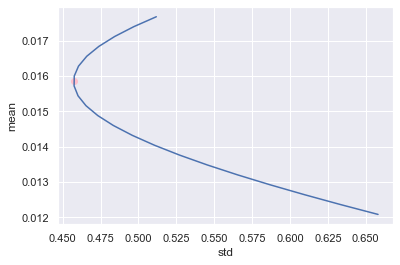

In [62]:
plt.plot(qq["STD"], qq["ŚREDNIA"])
plt.xlabel("std")
plt.ylabel("mean")

opt = wAA*jpy1 + (1-wAA)*aud1
plt.scatter(np.std(opt, ddof=1),np.mean(opt), color="pink")
plt.show()

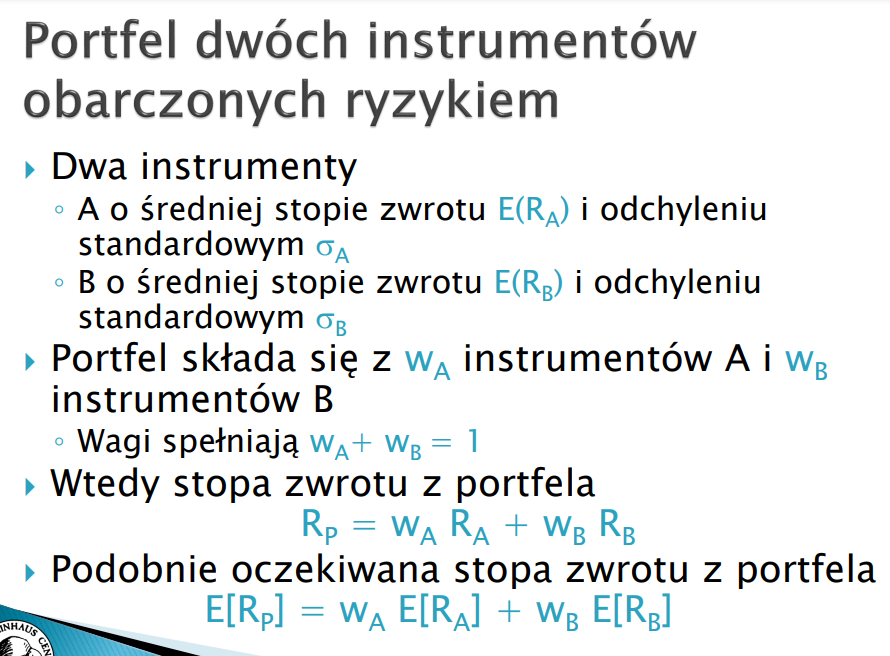

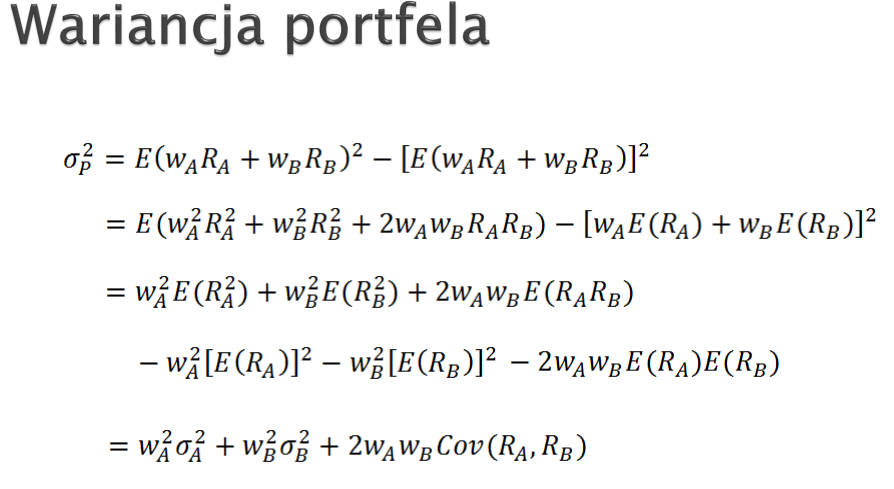
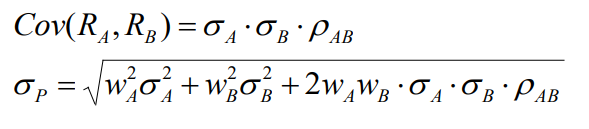

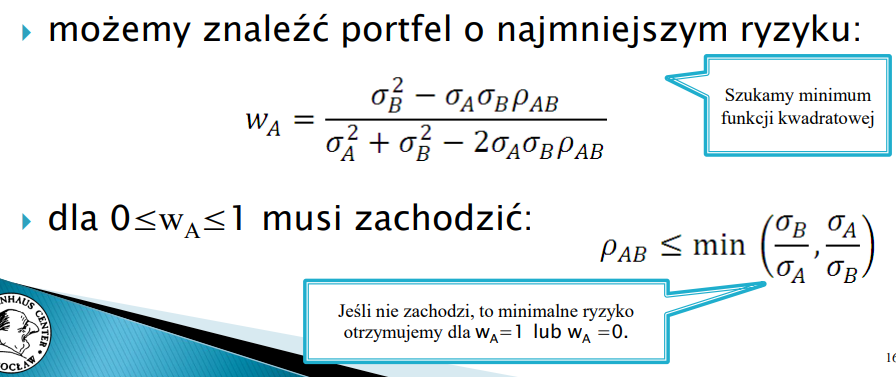

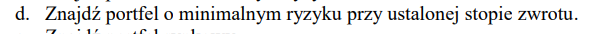

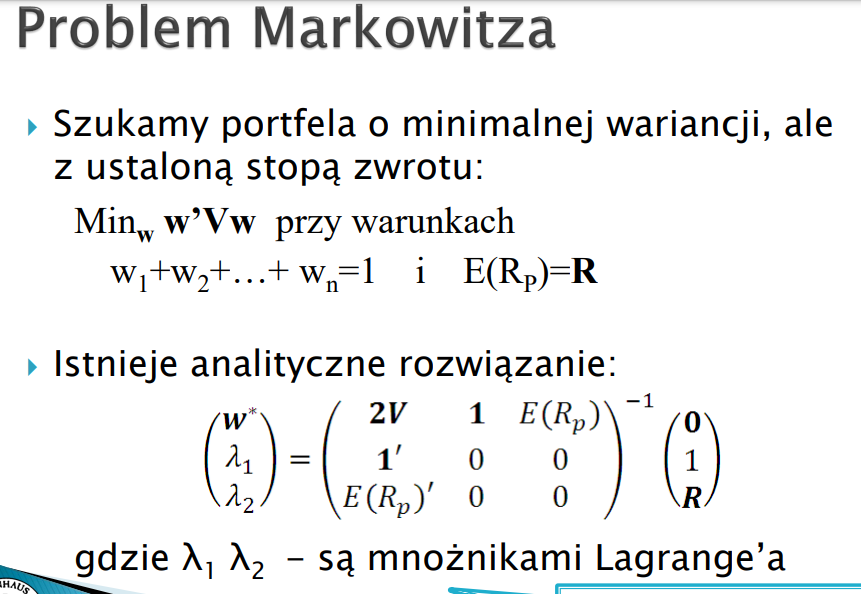

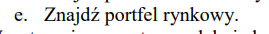

???


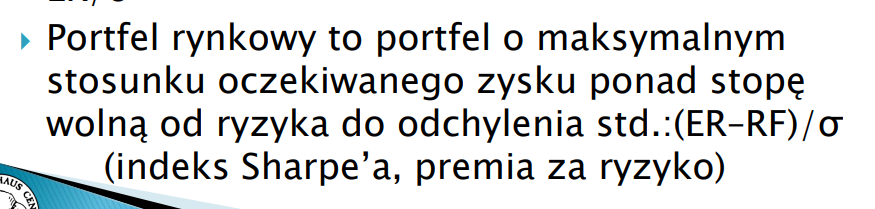

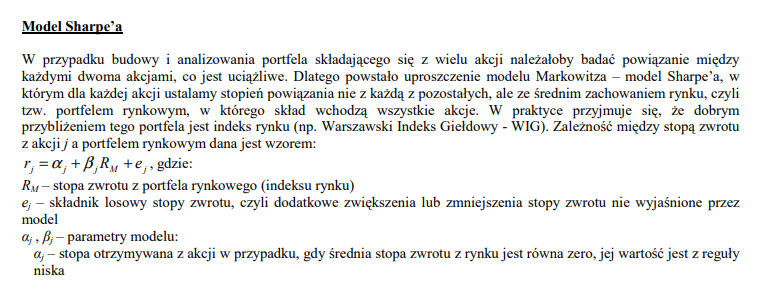

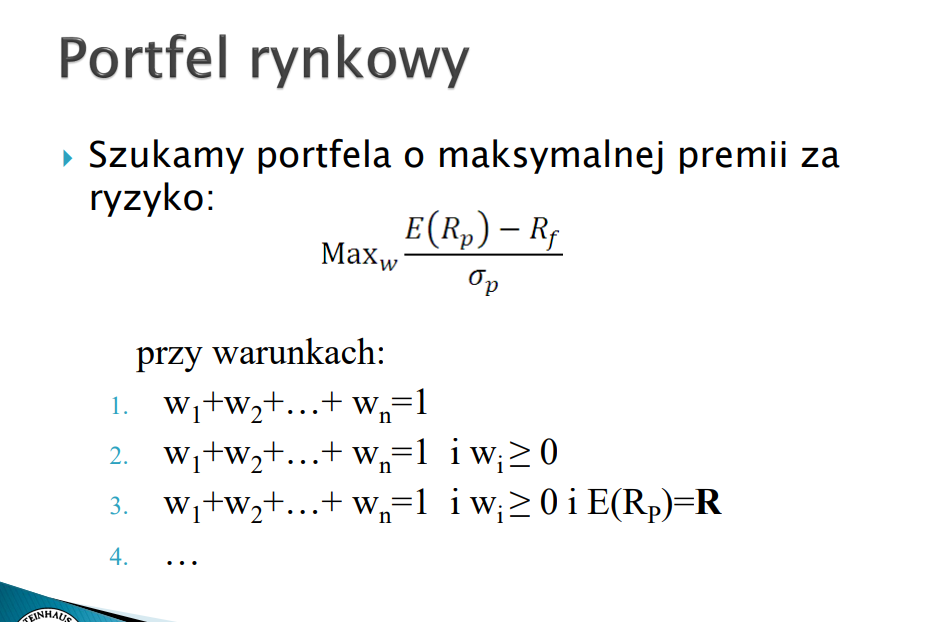

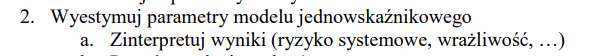

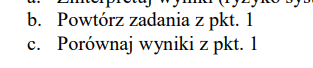